In [ ]:
pip install numpy matplotlib pandas requests japanize-matplotlib setuptools pyserial requests

In [3]:
import serial
import csv
import os
from datetime import datetime
import threading
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import requests
import time
import threading
from collections import deque
from IPython.display import display, clear_output

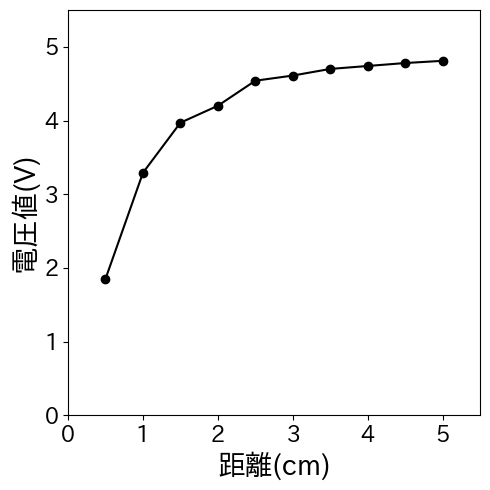

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.subplots()

data = pd.read_csv("workC1.csv")  

d = data['distance'].values
v = data['value'].values

plt.plot(d, v, marker='o', color='#000000', linestyle="-", markersize=6)
plt.xlabel("距離(cm)", fontsize=20)
plt.ylabel("電圧値(V)", fontsize=20)
plt.xlim(0,5.5)
plt.ylim(0,5.5)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.savefig("result_C1.png") 
plt.show()

In [ ]:
# ウェブページの取得
url = "https://admission.chibatech.ac.jp"
response = requests.get(url)
response.encoding = 'UTF-8' # エンコーディングをUTF-8に設定
# ステータスコードの表示
print("ステータスコード:", response.status_code)
# レスポンスヘッダの表示
print("レスポンスヘッダ:", response.headers)
# 生データ（取得したHTML）の表示
print("生データ:\n", response.text)
# 取得したHTMLをファイルに保存
with open('admission_chibatech.html', 'w', encoding='utf-8') as file:
    file.write(response.text)

In [45]:
student_id=26
url=f"http://192.168.{student_id}.2"
response=requests.get(url)

print("Status Code:",response.status_code)

print("Headers:",response.headers)

print("Raw Data:",response.text)

print("Value:",response.json()["value"])

Status Code: 200
Headers: {'Content-Type': 'application/json'}
Raw Data: {"value": 1.70}

Value: 1.7


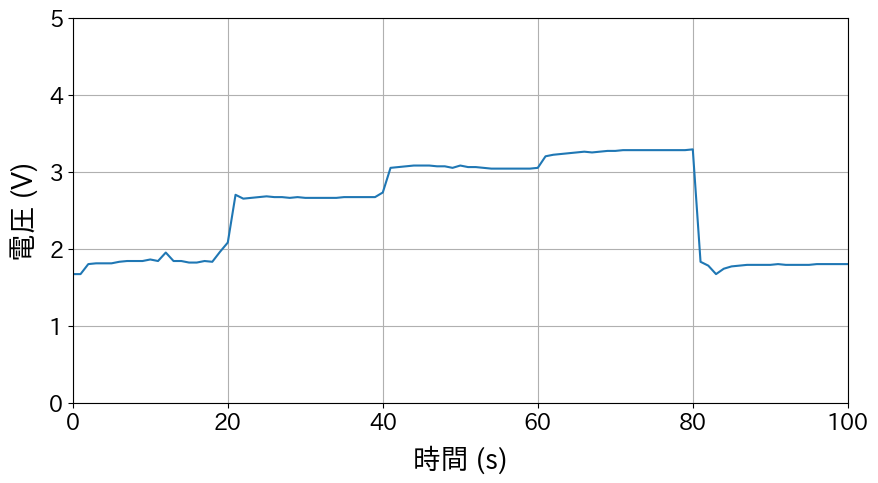

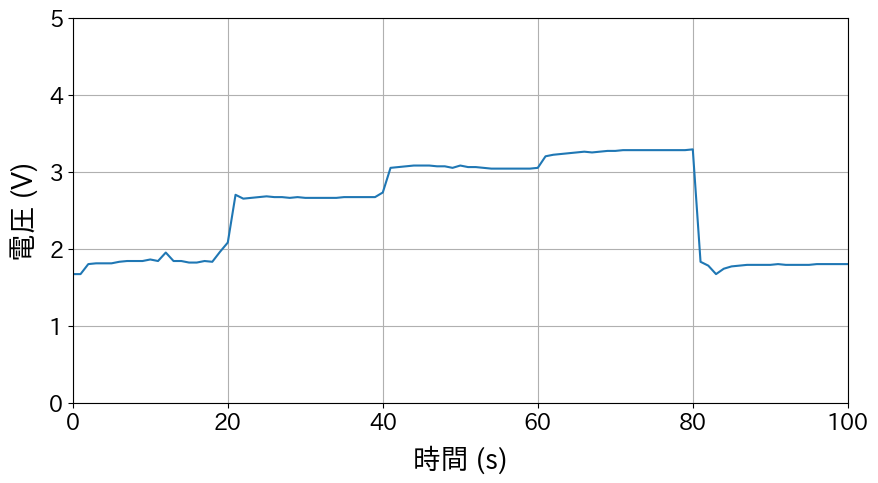

In [57]:
student_id=26
url=f"http://192.168.{student_id}.2"
num=101

queue=deque([0]*num)

plt.figure(figsize=(10,5))

def worker():
    try:
        r=requests.get(url,timeout=2)
        r.raise_for_status()
        val=r.json().get("value",0)
    except Exception:
        val=np.nan
    queue.popleft()
    queue.append(val)

def scheduler(interval, f, wait=True):
    base_time=time.perf_counter()
    threads=[]

    for i in range(num):
        t = threading.Thread(target=f)
        threads.append(t)
        t.start()

        if wait:
            t.join()

        next_time=(base_time + (i+1)*interval)-time.perf_counter()
        if next_time>0:
            time.sleep(next_time)
        
        # グラフ更新
        clear_output(wait=True)
        plt.cla()
        plt.plot(list(queue))
        plt.grid()
        plt.xlim(0, 100)
        plt.ylim(0, 5)
        plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
        plt.ylabel("電圧 (V)", fontsize=20, labelpad=8)
        plt.tick_params(labelsize=16)
        display(plt.gcf())

    for t in threads:
        t.join()

scheduler(1, worker, wait=False)

df = pd.DataFrame({'valtage':np.array(queue)})
df.to_csv('work_C2.csv', index=False)

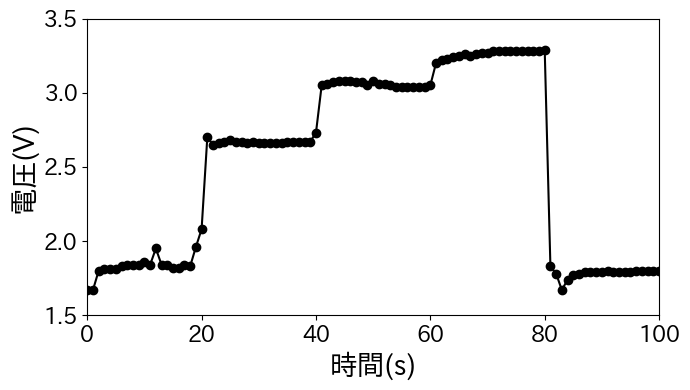

In [10]:
data = pd.read_csv("work_C2.csv", parse_dates=True)
plt.figure(figsize=(7, 4))
plt.plot(data['valtage'], marker='o', color="k", linestyle="-", markersize=6)
plt.xlabel("時間(s)", fontsize=20)
plt.ylabel("電圧(V)", fontsize=20)
plt.ylim(1.5,3.5)
plt.xlim(0,100)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_C2.png")

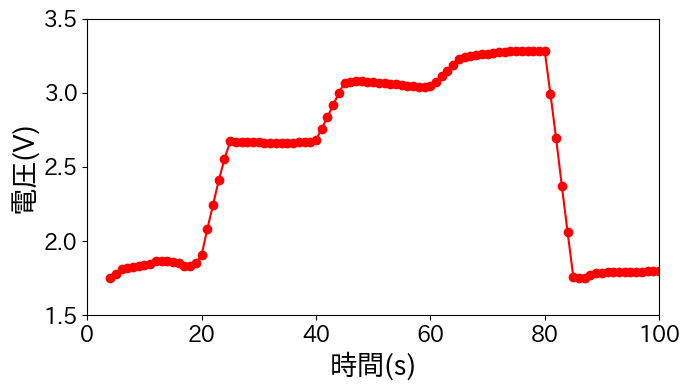

In [9]:
data= pd.read_csv("work_C2.csv")
window_size=5
data['MA']=data['valtage'].rolling(window=window_size).mean()
plt.figure(figsize=(7, 4))
plt.plot(data['MA'], marker='o', color="r", linestyle="-", markersize=6)
plt.xlabel("時間(s)", fontsize=20)
plt.ylabel("電圧(V)", fontsize=20)
plt.ylim(1.5,3.5)
plt.xlim(0,100)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_C2_MA.png")

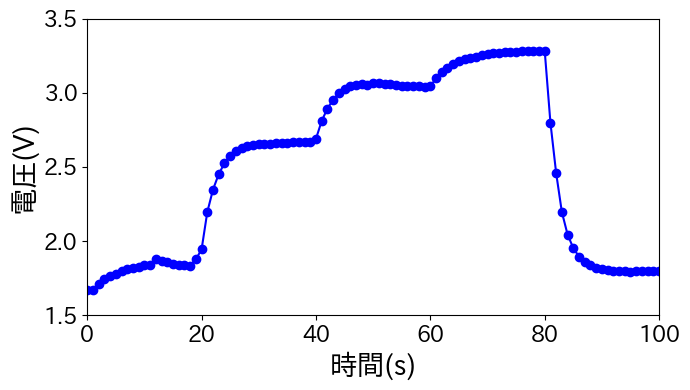

In [8]:
data= pd.read_csv("work_C2.csv")
window_size=5
data['SMA']=data['valtage'].rolling(window=window_size).mean()
data['EMA']=data['valtage'].ewm(span=window_size,adjust=False).mean()
plt.figure(figsize=(7, 4))
plt.plot(data['EMA'], marker='o', color="b", linestyle="-", markersize=6)
plt.xlabel("時間(s)", fontsize=20)
plt.ylabel("電圧(V)", fontsize=20)
plt.ylim(1.5,3.5)
plt.xlim(0,100)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_C2_EMA.png")